📊 Анализ результатов улучшенной модели
Метрики модели:
ROC-AUC: 0.7500
F1-Score: 0.2222
Accuracy: 0.6500
Количество признаков: 50


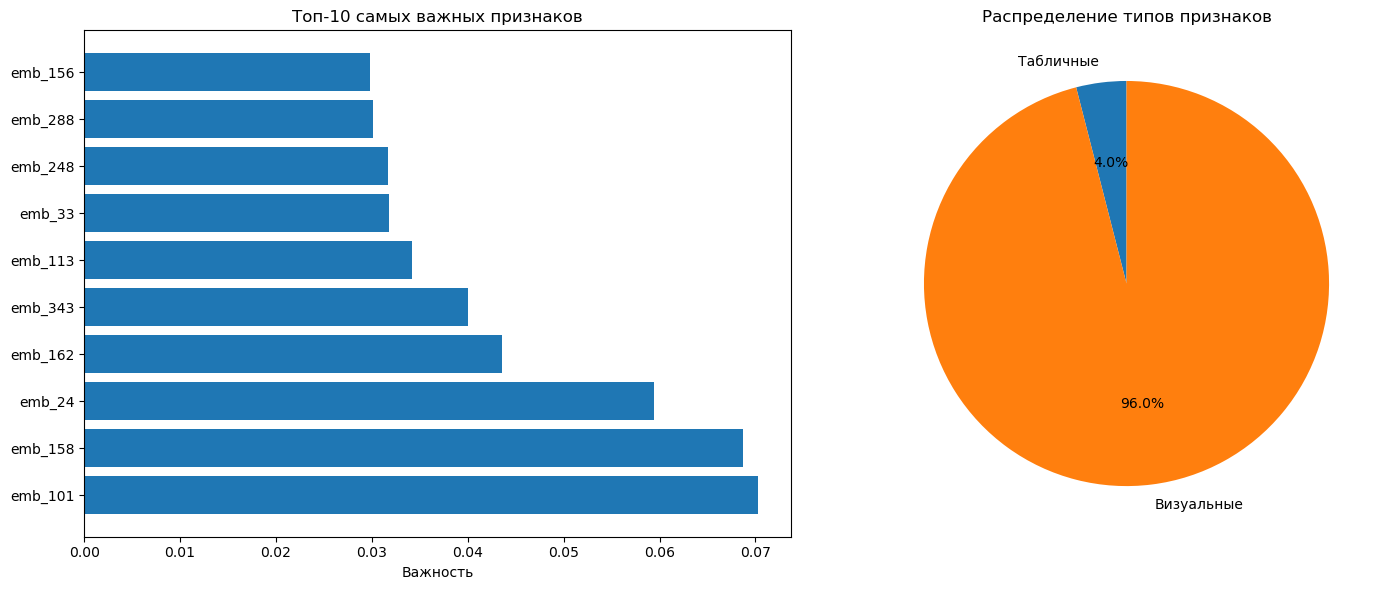


Анализ признаков:
Всего признаков: 50
Табличные признаки: 2
Визуальные признаки: 48

Самые важные табличные признаки:
  articleType_Shirts: 0.0061
  baseColour_Blue: 0.0042

Самые важные визуальные признаки:
  emb_101: 0.0702
  emb_158: 0.0687
  emb_24: 0.0595


In [1]:
# Демо-анализ результатов модели
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os

print("📊 Анализ результатов улучшенной модели")

# Загружаем метрики
with open('results_improved/metrics.json', 'r') as f:
    metrics = json.load(f)

print("Метрики модели:")
print(f"ROC-AUC: {metrics['roc_auc']:.4f}")
print(f"F1-Score: {metrics['f1_score']:.4f}") 
print(f"Accuracy: {metrics['accuracy']:.4f}")
print(f"Количество признаков: {metrics['feature_count']}")

# Загружаем важность признаков
feature_importance = pd.read_csv('results_improved/feature_importance.csv')

# Визуализация
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Топ-10 признаков
top_10 = feature_importance.head(10)
axes[0].barh(top_10['feature'], top_10['importance'])
axes[0].set_title('Топ-10 самых важных признаков')
axes[0].set_xlabel('Важность')

# Разделение на табличные и визуальные
tabular_features = feature_importance[~feature_importance['feature'].str.startswith('emb_')]
visual_features = feature_importance[feature_importance['feature'].str.startswith('emb_')]

feature_types = ['Табличные', 'Визуальные']
counts = [len(tabular_features), len(visual_features)]

axes[1].pie(counts, labels=feature_types, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Распределение типов признаков')

plt.tight_layout()
plt.show()

print(f"\nАнализ признаков:")
print(f"Всего признаков: {len(feature_importance)}")
print(f"Табличные признаки: {len(tabular_features)}")
print(f"Визуальные признаки: {len(visual_features)}")

if len(tabular_features) > 0:
    print(f"\nСамые важные табличные признаки:")
    for i, row in tabular_features.head(3).iterrows():
        print(f"  {row['feature']}: {row['importance']:.4f}")

if len(visual_features) > 0:
    print(f"\nСамые важные визуальные признаки:")
    for i, row in visual_features.head(3).iterrows():
        print(f"  {row['feature']}: {row['importance']:.4f}")